In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import yfinance as yf
stock_symbol = ['AMD', 'FB', 'FSV', 'INFY', 'KNX', 'MONDY', 'MTDR', 'JINDALSTEL.NS', 'TMUS', 'TSLA', 'TWTR']

def data_download(i):
    data = yf.download(tickers=i,period='1y',interval='1d')[['Close']]
    return(data.reset_index())

dfs = [data_download(s) for s in stock_symbol]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
from functools import reduce
data = reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs).iloc[:, 1:]
data.head()

C:\Users\Karen Pinto\AppData\Local\Temp\ipykernel_21688\4164625882.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Close_x'} in the result is deprecated and will raise a MergeError in a future version.
  data = reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs).iloc[:, 1:]
C:\Users\Karen Pinto\AppData\Local\Temp\ipykernel_21688\4164625882.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Close_x'} in the result is deprecated and will raise a MergeError in a future version.
  data = reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs).iloc[:, 1:]
C:\Users\Karen Pinto\AppData\Local\Temp\ipykernel_21688\4164625882.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Close_x'} in the result is deprecated and will raise a MergeError in a future version.
  data = reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs).iloc[:, 1:]
C:\Users\Karen Pinto\AppData\Local\Temp\ipykernel_21688\4164625882.py:

,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close
0,80.809998,329.130005,162.259995,19.270000,48.389999,55.830002,32.360001,396.500000,141.699997,623.900024,57.439999
1,81.970001,329.149994,162.509995,19.290001,47.619999,55.590000,32.439999,398.799988,140.979996,605.119995,57.160000
2,80.279999,326.040009,163.679993,19.139999,47.520000,56.099998,33.389999,397.399994,142.320007,572.840027,57.009998
3,81.580002,330.350006,165.020004,19.290001,47.200001,55.064999,32.939999,398.600006,144.509995,599.049988,59.000000
4,81.349998,336.579987,166.000000,19.400000,46.779999,55.778999,32.740002,404.750000,143.509995,605.130005,59.630001


In [4]:
returns = data.pct_change()
mean_daily_returns = returns.mean()
volatilities = returns.std()

In [5]:
mean_daily_returns * 252

Close_x    0.395134
Close_y   -0.415898
Close_x   -0.233619
Close_y    0.022401
Close_x    0.045780
Close_y   -0.303524
Close_x    0.851875
Close_y    0.055964
Close_x   -0.034878
Close_y    0.368302
Close     -0.255779
dtype: float64

In [6]:
volatilities * 252

Close_x    8.847876
Close_y    7.821704
Close_x    4.588300
Close_y    4.533974
Close_x    4.926627
Close_y    5.680466
Close_x    9.255462
Close_y    7.394877
Close_x    4.419308
Close_y    9.540665
Close      8.284941
dtype: float64

In [7]:
combine = pd.DataFrame({'returns': mean_daily_returns * 252,
                       'volatility': volatilities * 252})

c:\Users\Karen Pinto\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


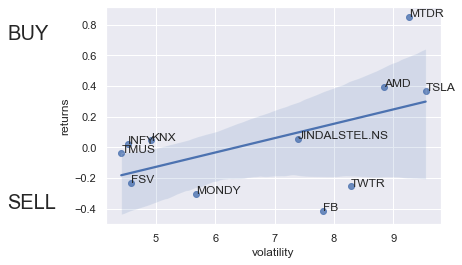

In [8]:
g = sns.regplot("volatility", "returns", data=combine)

for i in range(combine.shape[0]):
    plt.annotate(stock_symbol[i], (combine.iloc[i, 1], combine.iloc[i, 0]))
    
plt.text(2.5, -0.4, 'SELL', fontsize=20)
plt.text(2.5, 0.7, 'BUY', fontsize=20)
    
plt.show()